In [30]:
import GCRCatalogs
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

# Start by loading the redMaGiC halo catalog from CosmoDC2

In [31]:
# read in redmagic catalog
redmagic = pf.open('/global/projecta/projectdirs/lsst/groups/WL/users/zuntz/data/redmagic/cosmoDC2_v1.1.4_run_redmagic_highdens.fit')
redmagic_ids = redmagic[1].data['id']
redmagic_z = redmagic[1].data['zredmagic']
bin1 = (redmagic_z> 0.15)&(redmagic_z< 0.3) 

In [32]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

In [33]:
# GCRCatalogs.get_available_catalogs(names_only=True)

In [34]:
#halo_centrals = gc.get_quantities(['halo_mass', 'mag_i', 'redshift', 'halo_id', 'galaxy_id'], filters=['isCentral', 'redshift < 0.45', 'redshift > 0.'])

In [ ]:
halo_all = gc.get_quantities(['halo_mass', 'mag_i', 'redshift', 'halo_id', 'galaxy_id', 'isCentral'], filters=['redshift < 0.45', 'redshift > 0.'])

In [5]:
halo_all

{'halo_mass': array([1.38465125e+12, 1.38465125e+12, 1.32740122e+11, ...,
        1.29720459e+10, 1.06175264e+10, 3.52057759e+10]),
 'halo_id': array([        151487,         151487,      100151487, ...,
        -6049300146338, -6049400146338, -6049600146338]),
 'galaxy_id': array([9437500000, 9437500001, 9437500002, ..., 9125369105, 9125369106,
        9125369108]),
 'isCentral': array([ True, False,  True, ...,  True,  True,  True]),
 'mag_i': array([13.97073364, 17.42715836, 17.26276398, ..., 28.34869937,
        27.77245113, 26.79368475]),
 'redshift': array([0.02164939, 0.02191215, 0.02149119, ..., 0.43772677, 0.43822332,
        0.44431262])}

In [8]:
iscentral = halo_all['isCentral']==True

In [9]:
mask_all = np.in1d(halo_all['galaxy_id'],redmagic_ids[bin1])
mask_cent = np.in1d(halo_all['galaxy_id'][iscentral],redmagic_ids[bin1])
mask_sat = np.in1d(halo_all['galaxy_id'][~iscentral],redmagic_ids[bin1])

In [10]:
len(redmagic_ids[bin1])

28779

In [11]:
mask_all.sum(), mask_cent.sum(), mask_sat.sum()

(28779, 19175, 9604)

In [12]:
len(mask_all), len(mask_cent), len(mask_sat)

(42595286, 40610408, 1984878)

In [13]:
halo_mass_all = halo_all['halo_mass'][mask_all]
halo_mass_cent = halo_all['halo_mass'][iscentral][mask_cent]
halo_mass_sat = halo_all['halo_mass'][~iscentral][mask_sat]


halo_id_all = halo_all['halo_id'][mask_all]
halo_id_cent = halo_all['halo_id'][iscentral][mask_cent]
halo_id_sat = halo_all['halo_id'][~iscentral][mask_sat]

In [14]:
#number of halos occupied by at least one redmagic galaxy
n_halos = len(np.unique(halo_id_all))
print("The number of halos is:", n_halos)

#number of galaxies
n_tot = mask_all.sum()
print("The total number of galaxies is:", n_tot)
n_cent = mask_cent.sum()
print("The number of central galaxies is:", n_cent)
n_sat = mask_sat.sum()
print("The number of satellite galaxies is:", n_sat)
assert(n_tot==n_cent+n_sat)
sat_frac = n_sat/n_tot
print("The satellite fraction is:", sat_frac)
fcen = n_cent/n_halos
print("fcen is (fraction of halos occupied with central galaxies):", fcen)

The number of halos is: 24408
The total number of galaxies is: 28779
The number of central galaxies is: 19175
The number of satellite galaxies is: 9604
The satellite fraction is: 0.3337155564821571
fcen is (fraction of halos occupied with central galaxies): 0.7856030809570632


In [15]:
# mean halo mass of halos where satellites live is higher than where centrals live. That is because centrals are more visible. 
halo_mass_all.mean()/10**(13), halo_mass_cent.mean()/10**(13), halo_mass_sat.mean()/10**(13)

(4.119820461332881, 0.668343164987446, 11.01091554228079)

In [16]:
# create unique halo catalog of halos occupied by at least one redmagic galaxy:
halo_cat = {}
halo_cat['ids'], index_halo_unique = np.unique(halo_id_all, return_index=True)
halo_cat['mass'] = halo_mass_all[index_halo_unique]

In [17]:
# create unique halo catalog of all halos in cosmodc2
halo_cat_full = {}
zbin1_halos = (halo_all['redshift']>0.15) & (halo_all['redshift']<0.3 )
halo_cat_full['ids'], index_halo_unique = np.unique(halo_all['halo_id'][zbin1_halos], return_index=True)
halo_cat_full['mass'] = halo_all['halo_mass'][zbin1_halos][index_halo_unique]

n_halos_cosmodc2 = len(np.unique(halo_all['halo_id'][zbin1_halos]))
print("The number of halos in cosmodc2 is:", n_halos_cosmodc2)

The number of halos in cosmodc2 is: 11550942


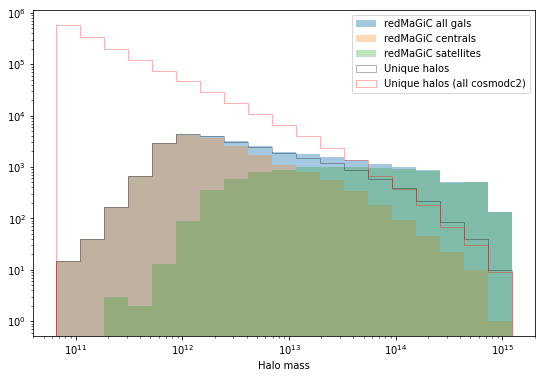

In [60]:
plt.figure(figsize = (9,6))
nbins = 20
bins = np.logspace(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()), nbins)
counts_allgals, _, _= plt.hist(halo_mass_all, label = 'redMaGiC all gals', bins = bins, log= True, alpha = 0.4)
counts_cent, _, _ = plt.hist(halo_mass_cent, label = 'redMaGiC centrals', bins = bins, log = True, alpha = 0.3)
counts_sat, _, _= plt.hist(halo_mass_sat, label = 'redMaGiC satellites', bins = bins, log= True, alpha = 0.3)
counts_uniquehalos, _, _  = plt.hist(halo_cat['mass'], label = 'Unique halos', bins = bins, alpha = 0.3, histtype = 'step', color = 'k')
counts_uniquehalos_cosmodc2, _, _  = plt.hist(halo_cat_full['mass'], label = 'Unique halos (all cosmodc2)', bins = bins, alpha = 0.3, histtype = 'step', color = 'red')
plt.xlabel('Halo mass')
plt.legend()
plt.xscale('log') 
plt.yscale('log')

### Plot the number of galaxies divided by the total number of halos in CosmoDC2

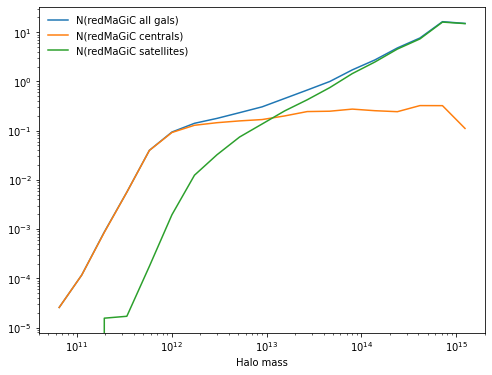

In [98]:
plt.figure(figsize = (8,6))
bins_centers = np.logspace(np.log10(halo_cat['mass'].min()), np.log10(halo_cat['mass'].max()), nbins-1)
plt.plot(bins_centers, counts_allgals/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC all gals)') #, color = 'blue' )
plt.plot(bins_centers, counts_cent/counts_uniquehalos_cosmodc2, label = 'N(redMaGiC centrals)' )#, color = 'orange' )
plt.plot(bins_centers, counts_sat/counts_uniquehalos_cosmodc2, label =  'N(redMaGiC satellites)')#, color = 'green')
#plt.axhline(y=fcen_2, color= 'black', ls = ':', label = 'fcen=%0.2f'%fcen )
plt.xlabel('Halo mass')
plt.legend(frameon=False)
plt.xscale('log') 
plt.yscale('log')

In [28]:
centrals_with_satellites = np.in1d(halo_id_cent, halo_id_sat)
print("Fraction of central galaxies that have satellite galaxies:", centrals_with_satellites.sum()/n_cent)

Fraction of central galaxies that have satellite galaxies: 0.05601043024771838


In [29]:
satellites_with_a_central = np.in1d(halo_id_sat, halo_id_cent)
print("Fraction of satellite galaxies that have a central galaxy:", satellites_with_a_central.sum()/n_sat)

Fraction of satellite galaxies that have a central galaxy: 0.2176176593086214


In [30]:
halo_ids_halos_with_both_centrals_and_satellites= []
halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_cent[centrals_with_satellites])
halo_ids_halos_with_both_centrals_and_satellites.extend(halo_id_sat[satellites_with_a_central])

In [31]:
print("Fraction of halos that host at least one redmagic galaxy and that are occupied by both centrals and satellites:", len(np.unique(halo_ids_halos_with_both_centrals_and_satellites))/n_tot)

Fraction of halos that host at least one redmagic galaxy and that are occupied by both centrals and satellites: 0.037318878348796


## Fitting the HOD parameters

In [46]:
from scipy.optimize import curve_fit
import scipy

In [33]:
def cen_num(Mh, Mmin, sigma_logM, fcen):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    -----
    - Mh: Halo mass, in Msun
    - Mmin: cutoff Halo Mass-scale, in Msun
    - sigma_logM: scattering in Halo Mass-Galaxy Luminosity relation
    - fcen: fraction of halos occupied by a central galaxy
    output
    ------
    the expected number of central galaxies
    """
    return 0.5 * fcen * (1. + np.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
def sat_num(Mh, M1, alpha, nc):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    -----
    - Mh: Halo mass, in Msun
    - M1: normalization Mass-scale, in Msun
    - alpha: high-mass power-law index
    - nc: number of central galaxies
    output
    ------
    the expected number of satellite galaxies
    """
    return nc * (Mh/M1)**alpha

In [29]:
halo_mass = bins_centers
N_cent = counts_cent/counts_uniquehalos_cosmodc2
N_sat = counts_sat/counts_uniquehalos_cosmodc2

NameError: name 'bins_centers' is not defined

### Fit each of the lines separately

In [110]:
# see example from https://stackoverflow.com/questions/51906152/fitting-two-sets-of-data-with-two-different-model-functions-simultaneously-givin
y1 = np.log10(N_cent)
y2 = np.log10(N_sat[2:])
comboY = np.append(y1, y2)

x1 = halo_mass
x2 = halo_mass[2:]
comboX = np.append(x1, x2)

if len(y1) != len(x1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y2) != len(x2):
    raise(Exception('Unequal x2 and y2 data length'))
    
    
def function1(Mh, Mmin, sigma_logM, fcen, M1, alpha): #  not all parameters are used here, some are shared
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    centrals = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    return np.log10(centrals)

def function2(Mh, Mmin, sigma_logM, fcen, M1, alpha):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    nc = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    satellites = nc * (Mh/M1)**alpha
    return np.log10(satellites)
    
def combinedFunction(comboData, Mmin, sigma_logM, fcen, M1, alpha):
    # single data reference passed in, extract separate data
    extract1 = comboData[:len(x1)] # first data
    extract2 = comboData[len(x1):] # second data

    result1 = function1(extract1, Mmin, sigma_logM, fcen, M1, alpha)
    result2 = function2(extract2, Mmin, sigma_logM, fcen, M1, alpha)

    return np.append(result1, result2)


# some initial parameter values
Mmin_0 = 10**12
simga_logM_0 = 0.3
fcen_0 = 0.2
M1_0 = 10**13
alpha_0 = 1.

initialParameters = np.array([Mmin_0,simga_logM_0, fcen_0, M1_0, alpha_0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, maxfev = 100000)

# values for display of fitted function
Mmin_fit, simga_logM_fit, fcen_fit, M1_fit, alpha_fit = fittedParameters

y_fit_1 = function1(x1, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # first data set, first equation
y_fit_2 = function2(x2, Mmin_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # second data set, second equation



print('Mmin = %0.2e, sigma_logM = %0.2f, fcen = %0.2f, M1 = %0.2e, alpha = %0.2f'%(Mmin_fit, simga_logM_fit, fcen_fit, M1_fit, alpha_fit))

Mmin = 2.11e+12, sigma_logM = 0.56, fcen = 0.25, M1 = 1.84e+13, alpha = 1.12


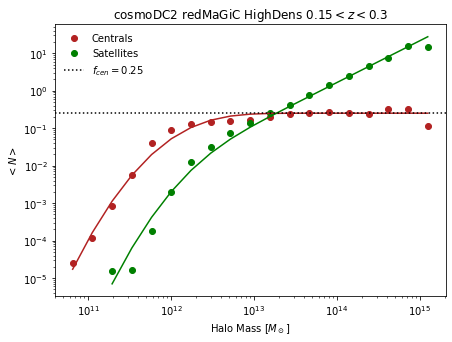

In [106]:
plt.figure(figsize = (7,5))
plt.plot(x1, 10**y1, 'o', color = 'firebrick', label = 'Centrals') # plot the raw data
plt.plot(x2, 10**y2, 'o', color = 'green', label = 'Satellites') # plot the raw data
plt.plot(x1, 10**y_fit_1, color = 'firebrick') # plot the equation using the fitted parameters
plt.plot(x2, 10**y_fit_2, color = 'g') # plot the equation using the fitted parameters
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$<N>$')
plt.xlabel ('Halo Mass [$M_\odot$]')
plt.title('cosmoDC2 redMaGiC HighDens $0.15< z< 0.3$')
plt.axhline(y = fcen_fit, label = '$f_{cen} = %0.2f$'%fcen_fit, ls = ':', color  = 'k')
plt.legend(frameon=False)
plt.show()

In [109]:
print('Log(Mmin) = %0.2f, sigma_logM = %0.2f, fcen = %0.2f, Log(M1) = %0.2f, alpha = %0.2f'%(np.log10(Mmin_fit), simga_logM_fit, fcen_fit, np.log10(M1_fit), alpha_fit))

Log(Mmin) = 12.32, sigma_logM = 0.56, fcen = 0.25, Log(M1) = 13.27, alpha = 1.12


## Try to do the same but with CCL HOD modeling

In [28]:
# see https://ccl.readthedocs.io/en/latest/api/pyccl.halos.profiles.html#pyccl.halos.profiles.HaloProfileHOD
y1 = np.log10(N_cent)
y2 = np.log10(N_sat[2:])
comboY = np.append(y1, y2)

x1 = halo_mass
x2 = halo_mass[2:]
comboX = np.append(x1, x2)

if len(y1) != len(x1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y2) != len(x2):
    raise(Exception('Unequal x2 and y2 data length'))
    
    
def function1(Mh, Mmin, M0, sigma_logM, fcen, M1, alpha): #  not all parameters are used here, some are shared
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    centrals = 0.5 * fcen * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) )
    return np.log10(centrals)

def function2(Mh, Mmin, M0, sigma_logM, fcen, M1, alpha):
    """
    Number of central galaxies, based on HOD, for single Halo mass
    input
    """
    nc = 0.5 * (1. + scipy.special.erf( (np.log10(Mh)-np.log10(Mmin))/sigma_logM) ) 
    satellites = nc * (np.fabs(Mh-M0)/M1)**alpha
    return np.heaviside(M-M0, 1)*np.log10(satellites)
    
def combinedFunction(comboData, Mmin, M0, sigma_logM, fcen, M1, alpha):
    # single data reference passed in, extract separate data
    extract1 = comboData[:len(x1)] # first data
    extract2 = comboData[len(x1):] # second data

    result1 = function1(extract1, Mmin, M0, sigma_logM, fcen, M1, alpha)
    result2 = function2(extract2, Mmin, M0, sigma_logM, fcen, M1, alpha)

    return np.append(result1, result2)


# some initial parameter values
Mmin_0 = 10**12
M0_0 = 10**12
simga_logM_0 = 0.3
fcen_0 = 0.2
M1_0 = 10**13
alpha_0 = 1.

initialParameters = np.array([Mmin_0, M0_0, simga_logM_0, fcen_0, M1_0, alpha_0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, maxfev = 100000)

# values for display of fitted function
Mmin_fit, M0_fit, simga_logM_fit, fcen_fit, M1_fit, alpha_fit = fittedParameters

y_fit_1 = function1(x1, Mmin_fit, M0_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # first data set, first equation
y_fit_2 = function2(x2, Mmin_fit, M0_fit, sigma_logM_fit, fcen_fit, M1_fit, alpha_fit) # second data set, second equation



print('Mmin = %0.2e, M0 = %0.2e, sigma_logM = %0.2f, fcen = %0.2f, M1 = %0.2e, alpha = %0.2f'%(Mmin_fit,  M0_fit, simga_logM_fit, fcen_fit, M1_fit, alpha_fit))

NameError: name 'N_cent' is not defined

# Get galaxy bias from HOD parameters

In [6]:
import pyccl as ccl
import numpy as np

# see https://github.com/LSSTDESC/CCLX/blob/master/Halo-mass-function-example.ipynb for examples 

In [18]:
# Cosmology
cosmo1 = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')

#changing sigma8
cosmo2 = ccl.Cosmology(Omega_c=0.2199999, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.7, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')
#changing omega_m
cosmo3 = ccl.Cosmology(Omega_c=0.27, Omega_b=0.0448, h=0.71, n_s=0.963, sigma8=0.8, 
                        A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, 
                        T_CMB=None, bcm_log10Mc=14.07918, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, 
                        sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, 
                        z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', 
                        baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', 
                        emulator_neutrinos='strict')

# Array of masses
m_arr = np.geomspace(1E10,1E15,128)

# Array of redshifts
z_arr = np.linspace(0.,1.,16)

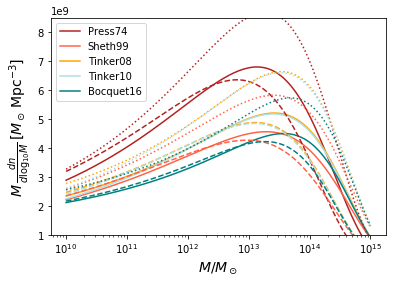

In [19]:

plt.figure()
cosmos = [cosmo1, cosmo2, cosmo3 ]
ls = ['-', '--', ':']
colors = ['firebrick', 'tomato', 'orange', 'powderblue', 'teal', 'k']
for i, cosmo in enumerate(cosmos):
    hmfs = []
    # Press & Schechter mass function
    hmfs.append(ccl.halos.MassFuncPress74(cosmo))

    # Sheth & Tormen mass function
    hmfs.append(ccl.halos.MassFuncSheth99(cosmo))

    # Tinker 2008 mass function
    hmfs.append(ccl.halos.MassFuncTinker08(cosmo))

    # Tinker 2010 mass function
    hmfs.append(ccl.halos.MassFuncTinker10(cosmo))

    # Bocquet 2016 mass function
    hmfs.append(ccl.halos.MassFuncBocquet16(cosmo))

    # Let's plot all of them at z=0

    for j, mf in enumerate(hmfs):
        nm = mf.get_mass_function(cosmo, m_arr, 1.)
        if i==0:
            plt.plot(m_arr, m_arr * nm, label=mf.name, ls = ls[i], color = colors[j])
        else:
            plt.plot(m_arr, m_arr * nm, ls = ls[i], color = colors[j])
plt.xscale('log')
plt.ylim([1E9,8.5E9])
plt.legend()
plt.xlabel(r'$M/M_\odot$', fontsize=14)
plt.ylabel(r'$M\,\frac{dn}{d\log_{10}M}\,[M_\odot\,{\rm Mpc}^{-3}]$',
           fontsize=14);